# Spam Email Detection Using Machine Learning

**Overview:**
This project demonstrates a basic yet powerful spam detection system built using Python and machine learning. The model is trained to classify emails as either **SPAM** or **HAM (legitimate email)** using natural language processing techniques.

**Key Features:**

* **Dataset Preprocessing:**
  Emails are loaded and labeled, with the text data cleaned and split into training and testing sets (80/20 split).

* **Text Vectorization:**
  TF-IDF (`TfidfVectorizer`) is used to convert raw email texts into numerical feature vectors, excluding common English stop words.

* **Model Training:**
  A `Multinomial Naive Bayes` classifier, widely used for text classification tasks, is trained on the TF-IDF features.

* **Model Evaluation:**
  The classifier is evaluated on the test set using `classification_report`, providing metrics like precision, recall, and F1-score.

* **Real-Time Prediction:**
  The model can predict whether a new email is spam or not with just a few lines of code.

* **Model Persistence:**
  Both the trained model and vectorizer are saved using `joblib` for future use, enabling easy integration into a web app, API, or automation pipeline.

**Technologies Used:**

* Python
* Scikit-learn
* Pandas
* Joblib
* TF-IDF Vectorization

**Use Cases:**

* Email spam filters
* Content moderation
* Phishing detection in customer support pipelines

[**THE DATASET: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification**](https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification) 

## install requirements

In [ ]:
!pip install scikit-learn nltk seaborn pandas

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### We read classified email data

In [100]:
mails = pd.read_csv('../data/email.csv')

In [101]:
CATEGORY, MESSAGE = 'Category', 'Message'

In [102]:
mails = mails.dropna(subset=[CATEGORY, MESSAGE])

---

### Observe the classified data in the pie chart (optionel)

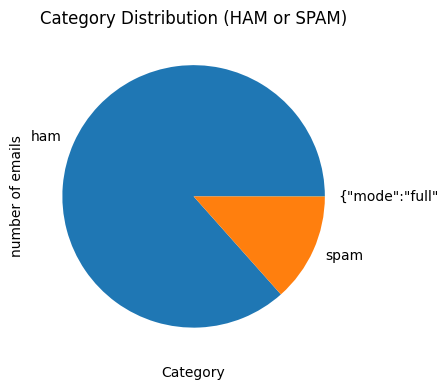

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
mails[CATEGORY].value_counts().plot(kind="pie", color=["green", "red"])
plt.title("Category Distribution (HAM or SPAM)")
plt.xlabel("Category")
plt.ylabel("number of emails")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---

## time for machine learning

In [104]:
# Convert email category labels from text to numerical values: "ham" → 0, "spam" → 1
mails[CATEGORY] = mails[CATEGORY].map({"ham": 0, "spam": 1})

# Drop any rows where the category value is missing (after mapping)
mails = mails.dropna(subset=[CATEGORY])

In [105]:
# Split the dataset into training and testing sets: 80% for training, 20% for testing (features = messages, labels = categories)
X_train, X_test, y_train, y_test = train_test_split(mails[MESSAGE], mails[CATEGORY], test_size=0.2)

In [106]:
# Create a TF-IDF vectorizer that removes common English stop words (e.g., "the", "and")
vectorizer = TfidfVectorizer(stop_words="english")

# Learn vocabulary from training data and transform X_train into TF-IDF feature vectors
X_train_vect = vectorizer.fit_transform(X_train)

# Transform X_test using the same vocabulary learned from training data
X_test_vect = vectorizer.transform(X_test)

In [107]:
# Initialize a Multinomial Naive Bayes classifier (commonly used for text classification)
model = MultinomialNB()

# Train the model using the TF-IDF-transformed training data and corresponding labels
model.fit(X_train_vect, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [110]:
# Use the trained model to predict labels for the test data
y_pred = model.predict(X_test_vect)

# Print a detailed classification report showing precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       973
         1.0       1.00      0.80      0.89       142

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.98      0.97      0.97      1115



## TEST

In [111]:
# Define a new email to classify
new_mail = ["You get won click the link and take your free gift"]

# Transform the new email using the same TF-IDF vectorizer
new_vect = vectorizer.transform(new_mail)

# Predict whether the new email is spam (1) or ham (0)
prediction = model.predict(new_vect)

# Print the classification result
print("SPAM" if prediction[0] == 1 else "HAM (normal mail)")

SPAM


In [ ]:
import joblib

# Save the trained model to a file for future use
joblib.dump(model, "../models/spam_model.pkl")

# Save the fitted TF-IDF vectorizer to a file to ensure consistent preprocessing later
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")

---